In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Visualization

In [56]:
# Read in data
df = pd.read_csv('../Data/body_level_classification_train.csv')
df.head()

,Gender,Age,Height,Weight,H_Cal_Consump,Veg_Consump,Water_Consump,Alcohol_Consump,Smoking,Meal_Count,Food_Between_Meals,Fam_Hist,H_Cal_Burn,Phys_Act,Time_E_Dev,Transport,Body_Level
0,Female,22.547298,1.722461,51.881263,yes,2.663421,1.041110,no,no,3.000000,Frequently,yes,no,0.794402,1.391948,Public_Transportation,Body Level 1
1,Male,19.799054,1.743702,54.927529,yes,2.000000,2.847264,Sometimes,no,3.289260,Sometimes,yes,no,1.680844,2.000000,Public_Transportation,Body Level 1
2,Female,17.823438,1.708406,50.000000,yes,1.642241,1.099231,Sometimes,no,3.452590,Sometimes,no,no,0.418875,1.000000,Public_Transportation,Body Level 1
3,Female,19.007177,1.690727,49.895716,yes,1.212908,1.029703,Sometimes,no,3.207071,Sometimes,no,no,2.000000,1.000000,Public_Transportation,Body Level 1
4,Male,19.729250,1.793315,58.195150,yes,2.508835,2.076933,no,no,3.435905,Sometimes,yes,no,2.026668,1.443328,Automobile,Body Level 1


In [57]:
df.nunique()

Gender                   2
Age                    993
Height                1113
Weight                1081
H_Cal_Consump            2
Veg_Consump            578
Water_Consump          894
Alcohol_Consump          4
Smoking                  2
Meal_Count             460
Food_Between_Meals       4
Fam_Hist                 2
H_Cal_Burn               2
Phys_Act               846
Time_E_Dev             785
Transport                5
Body_Level               4
dtype: int64

In [58]:
df.dtypes

Gender                 object
Age                   float64
Height                float64
Weight                float64
H_Cal_Consump          object
Veg_Consump           float64
Water_Consump         float64
Alcohol_Consump        object
Smoking                object
Meal_Count            float64
Food_Between_Meals     object
Fam_Hist               object
H_Cal_Burn             object
Phys_Act              float64
Time_E_Dev            float64
Transport              object
Body_Level             object
dtype: object

In [59]:
# Check for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1477 entries, 0 to 1476
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              1477 non-null   object 
 1   Age                 1477 non-null   float64
 2   Height              1477 non-null   float64
 3   Weight              1477 non-null   float64
 4   H_Cal_Consump       1477 non-null   object 
 5   Veg_Consump         1477 non-null   float64
 6   Water_Consump       1477 non-null   float64
 7   Alcohol_Consump     1477 non-null   object 
 8   Smoking             1477 non-null   object 
 9   Meal_Count          1477 non-null   float64
 10  Food_Between_Meals  1477 non-null   object 
 11  Fam_Hist            1477 non-null   object 
 12  H_Cal_Burn          1477 non-null   object 
 13  Phys_Act            1477 non-null   float64
 14  Time_E_Dev          1477 non-null   float64
 15  Transport           1477 non-null   object 
 16  Body_L

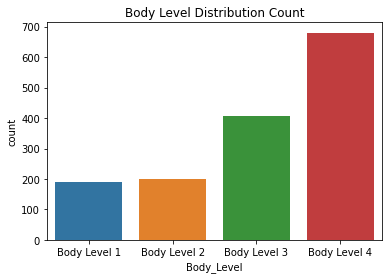

Body Level 4    0.460393
Body Level 3    0.274882
Body Level 2    0.136087
Body Level 1    0.128639
Name: Body_Level, dtype: float64

In [60]:
#  body level distribution 
sns.countplot(x='Body_Level', data=df)
plt.title('Body Level Distribution Count')
plt.show()
df['Body_Level'].value_counts(normalize=True)
# need to balance the data

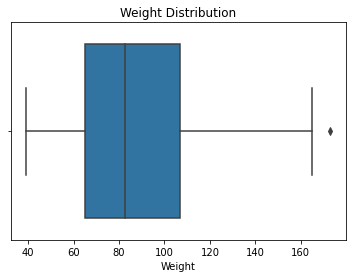

In [61]:
# show the outliers of weight
sns.boxplot(x=df['Weight'])
plt.title('Weight Distribution')
plt.show()

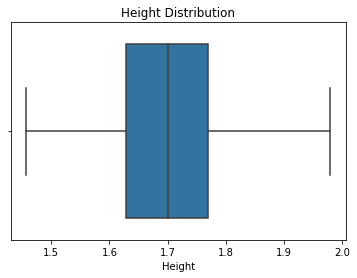

In [62]:
sns.boxplot(x=df['Height'])
plt.title('Height Distribution')
plt.show()

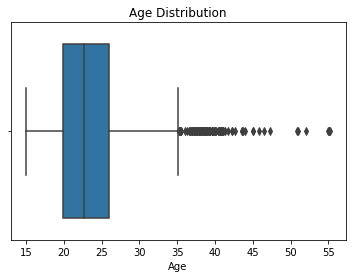

In [63]:
sns.boxplot(x=df['Age'])
plt.title('Age Distribution')
plt.show()
# There are outliers in age

In [64]:
print('Count of ages over 35: ', len(df[df['Age'] > 35]))

Count of ages over 35:  120


## preprocessing 

In [65]:
## Need to remove outliers ?? 
# sns.boxplot(x=df['Age'])
# plt.title('Age Distribution')
# plt.show()

In [66]:
# make array to save the columns that are not numeric
# non_numeric = []
# for column in df.columns:
#     if df[column].dtype == 'object':
#         non_numeric.append(column)
# # for each column in the non_numeric array, change the the unique values to numbers from 0 to n
# for column in non_numeric:
#     df[column] = pd.factorize(df[column])[0]

# make the categorical columns into one hot encoding
categorical_cols = ['Gender','H_Cal_Consump','Alcohol_Consump','Smoking','Food_Between_Meals','Fam_Hist','H_Cal_Burn','Transport']
def encode_categorical(df):
    for categorical in categorical_cols:
        encoded_cat = pd.get_dummies(df[categorical], prefix=categorical, prefix_sep='_')
        df = (df.drop([categorical], axis=1)).join(encoded_cat)
    return df
df = encode_categorical(df)
df.head()

,Age,Height,Weight,Veg_Consump,Water_Consump,Meal_Count,Phys_Act,Time_E_Dev,Body_Level,Gender_Female,...,Food_Between_Meals_no,Fam_Hist_no,Fam_Hist_yes,H_Cal_Burn_no,H_Cal_Burn_yes,Transport_Automobile,Transport_Bike,Transport_Motorbike,Transport_Public_Transportation,Transport_Walking
0,22.547298,1.722461,51.881263,2.663421,1.041110,3.000000,0.794402,1.391948,Body Level 1,1,...,0,0,1,1,0,0,0,0,1,0
1,19.799054,1.743702,54.927529,2.000000,2.847264,3.289260,1.680844,2.000000,Body Level 1,0,...,0,0,1,1,0,0,0,0,1,0
2,17.823438,1.708406,50.000000,1.642241,1.099231,3.452590,0.418875,1.000000,Body Level 1,1,...,0,1,0,1,0,0,0,0,1,0
3,19.007177,1.690727,49.895716,1.212908,1.029703,3.207071,2.000000,1.000000,Body Level 1,1,...,0,1,0,1,0,0,0,0,1,0
4,19.729250,1.793315,58.195150,2.508835,2.076933,3.435905,2.026668,1.443328,Body Level 1,0,...,0,0,1,1,0,1,0,0,0,0


In [67]:
# Gender                   2
# H_Cal_Consump            2
# Alcohol_Consump          4
# Smoking                  2
# Food_Between_Meals       4
# Fam_Hist                 2
# H_Cal_Burn               2
# Transport                5
# Body_Level               4
# will writ comments to show the meaning of numbers in the columns that are not numeric
# gender : female 0 and male 1
# H_Cal_Consump : yes 0 and no 1
# Alcohol_Consump : no 0, sometimes 1, frequently 2, always 3
# Smoking : no 0 and yes 1
# Food_Between_Meals : frequently 0, sometimes 1, no 2, always 3
# Fam_Hist : yes 0 and no 1
# H_Cal_Burn : no 0 and yes 1
# Transport : public 0, automobile 1, walking 2, bike 3, motorbike 4
# Body_Level : BL1 0, BL2 1, BL3 2, BL4 3


## test before oversampling

In [68]:
#  see the accuracy before balancing the data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# the target is Body_Level
X = df.drop('Body_Level', axis=1)
y = df['Body_Level']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Accuracy of logistic regression classifier on test set: 0.83


c:\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Balance the data using Over-sampling

In [69]:
# balance the data by  random oversampling 


# save features and labels

In [70]:
df.to_csv('../Data/preprocessedData.csv', index=False)